In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [329]:
heart=pd.read_csv('heart.csv')

In [330]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [ ]:
heart.columns

In [332]:
female = len(heart[heart['sex'] ==0])
male = len(heart[heart['sex'] ==1])
print('Percentage of female: {:.2f} %' .format(female/len(heart['sex'])*100))
print('Percentage of male: {:.2f} %' .format(male/len(heart['sex'])*100))

Percentage of female: 31.68 %
Percentage of male: 68.32 %


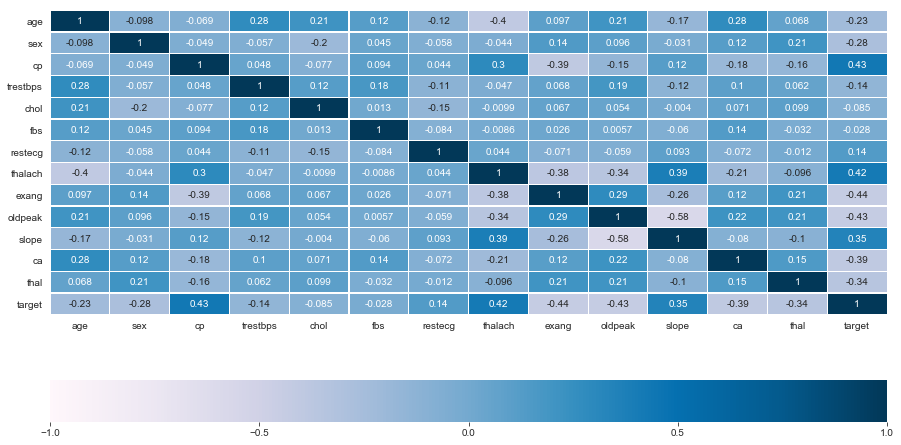

In [333]:
plt.figure(figsize=(15,8))
cbar_kws = { 'ticks' : [-1, -0.5, 0, 0.5, 1], 'orientation': 'horizontal'}
sns.heatmap(heart.corr(), cmap='PuBu', linewidths=0.1, annot=True, vmax=1, vmin=-1, cbar_kws=cbar_kws)

Text(0.5, 1.0, 'Distribution of age')

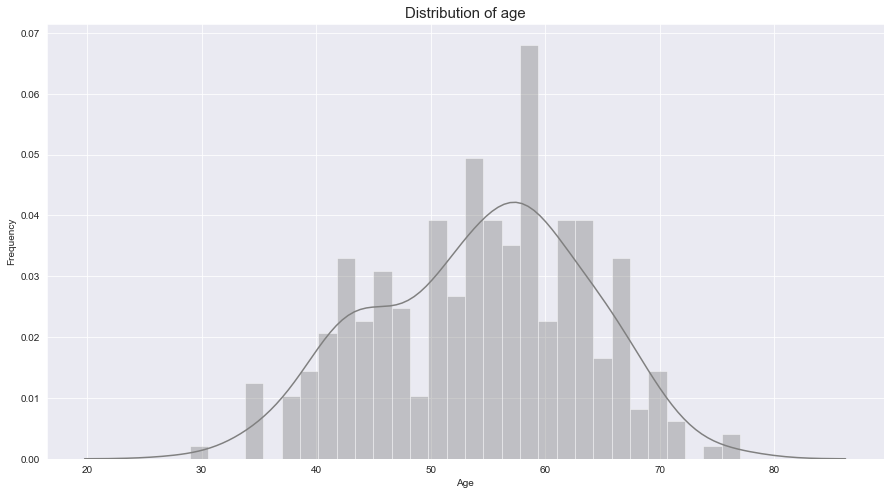

In [334]:
plt.figure(figsize=(15,8))
sns.distplot(heart['age'], hist=True, bins=30, color='grey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=15)

In [335]:
heart['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      1
8      1
9      1
10     1
11     0
12     1
13     1
14     0
15     0
16     0
17     0
18     1
19     0
20     1
21     1
22     1
23     1
24     1
25     0
26     1
27     1
28     0
29     1
      ..
273    1
274    1
275    1
276    1
277    1
278    0
279    1
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    0
290    1
291    1
292    0
293    1
294    1
295    1
296    0
297    1
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64>

Text(0.5, 1.0, 'Gender')

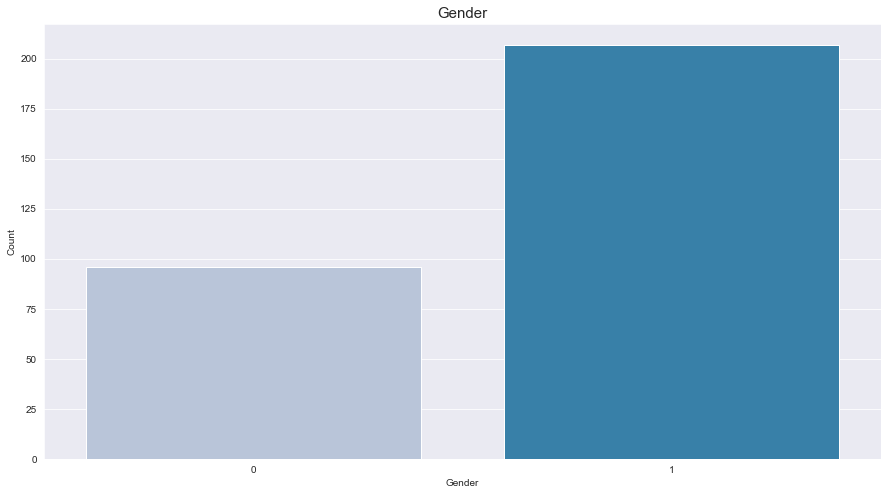

In [336]:
plt.figure(figsize=(15,8))
sns.countplot(heart['sex'], palette='PuBu')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender', fontsize=15)

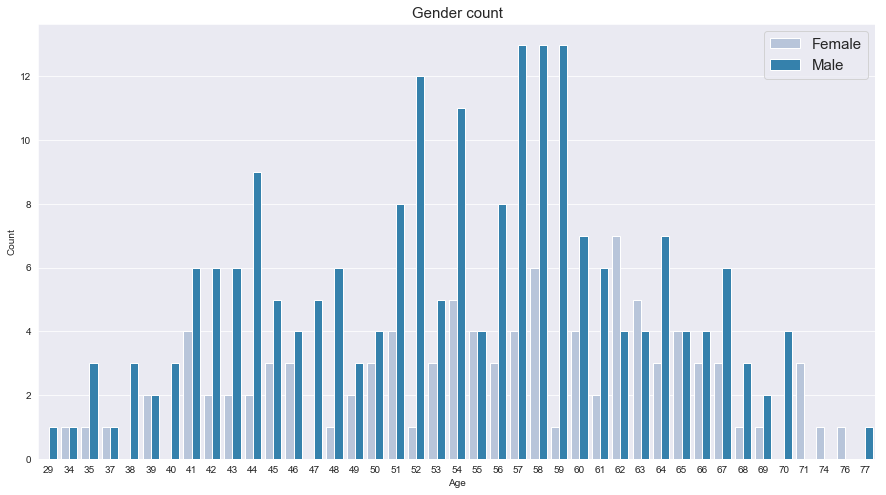

In [337]:
plt.figure(figsize=(15,8))
sns.countplot(heart['age'], hue=heart['sex'], palette='PuBu', saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['Female', 'Male'])

Text(0.5, 1.0, 'Target count')

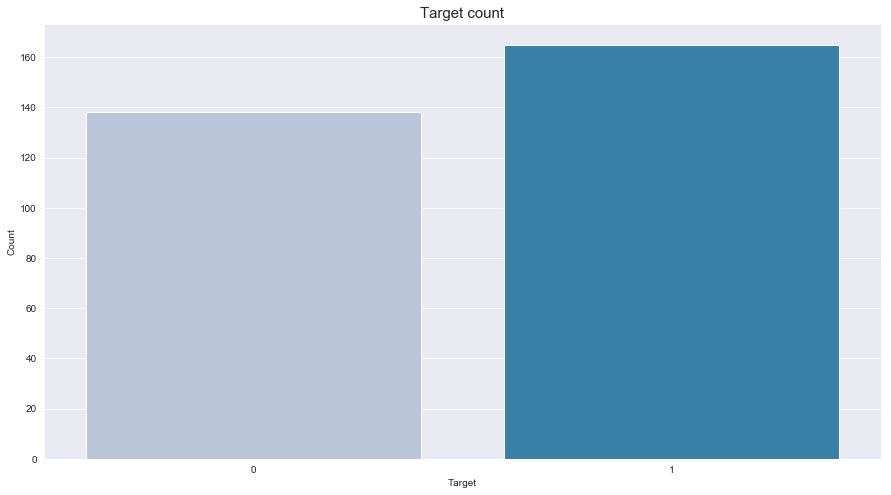

In [338]:
plt.figure(figsize=(15,8))
sns.countplot(heart['target'], palette='PuBu')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target count', fontsize=15)

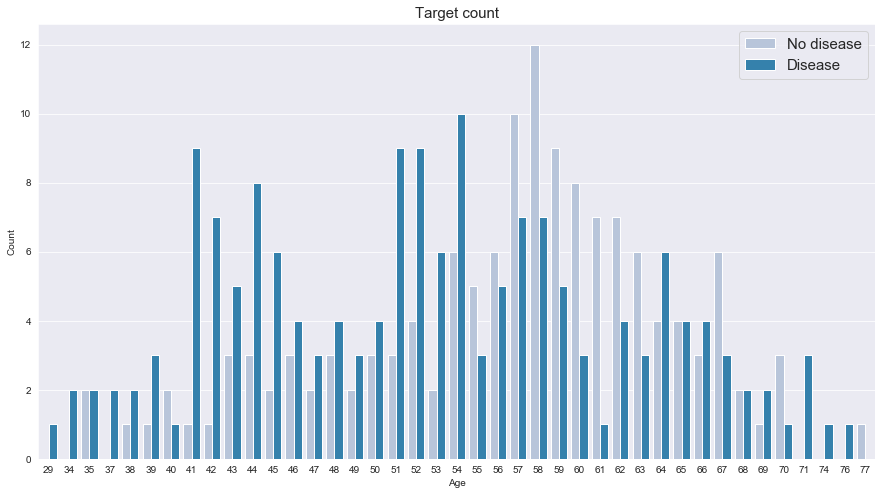

In [339]:
plt.figure(figsize=(15,8))
sns.countplot(heart['age'], hue=heart['target'], palette='PuBu', saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['No disease', 'Disease'])

In [340]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients without Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients without Heart Disease: 45.54%
Percentage of Patients with Heart Disease: 54.46%


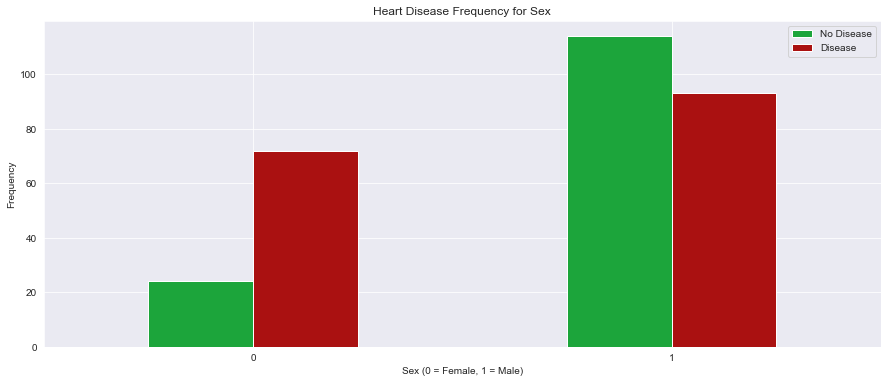

In [341]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

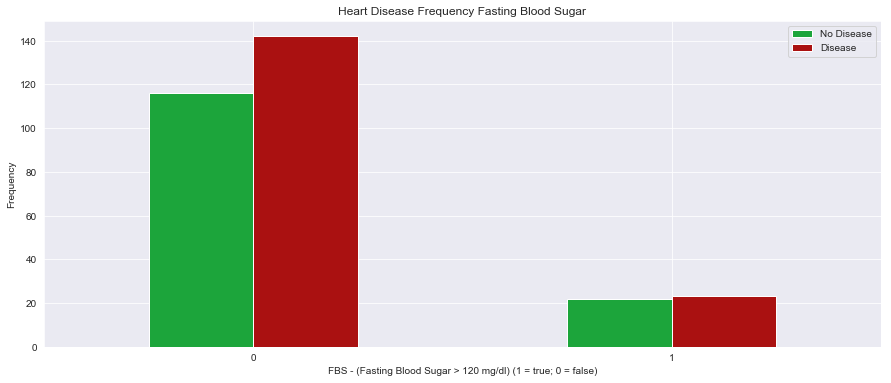

In [342]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

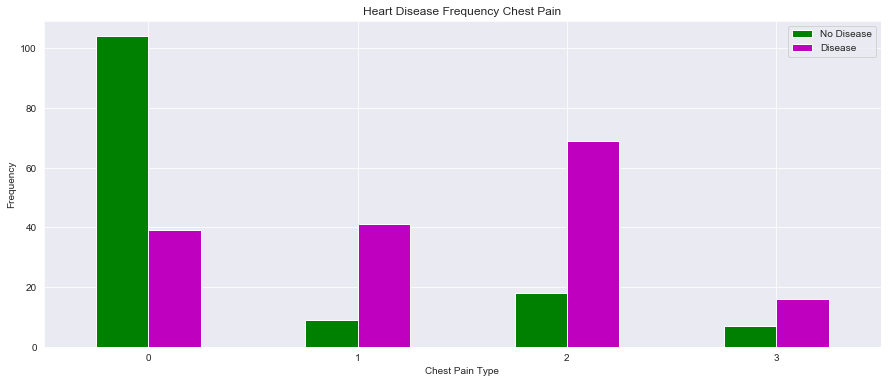

In [343]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['g','m'])
plt.title('Heart Disease Frequency Chest Pain')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

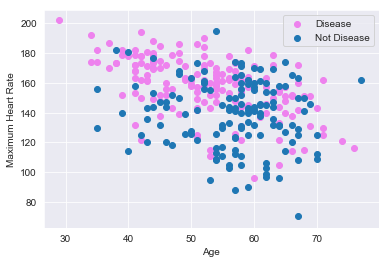

In [344]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="violet")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

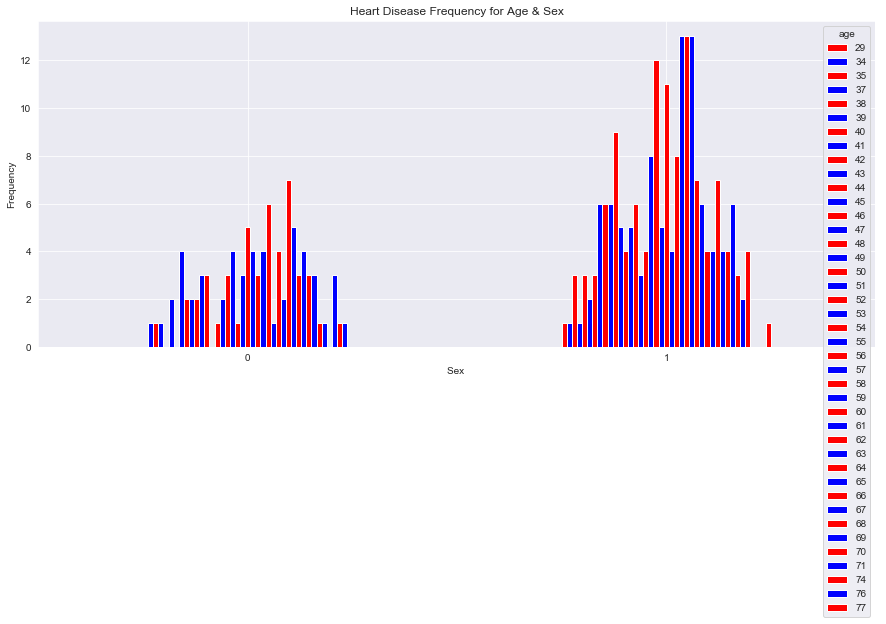

In [345]:
pd.crosstab(heart.sex,heart.age).plot(kind="bar",figsize=(15,6),color=['r','b'])
plt.title('Heart Disease Frequency for Age & Sex')
plt.xlabel('Sex ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# # Data Cleaning & Preprocessing

In [346]:
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

In [347]:
frames = [heart,a,b,c]
heart = pd.concat(frames, axis = 1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [348]:
heart = heart.drop(columns = ['cp','thal','slope'])
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [349]:
X = heart.drop(['target'], axis=1)
y = heart.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(X, columns=['sex','fbs','restecg','exang','ca'])
X_encoded.head()


,age,trestbps,chol,thalach,oldpeak,cp_0,cp_1,cp_2,cp_3,thal_0,...,restecg_0,restecg_1,restecg_2,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,145,233,150,2.3,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,41,130,204,172,1.4,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,56,120,236,178,0.8,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,57,120,354,163,0.6,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [350]:
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [351]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [352]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1',
       'slope_2', 'sex_0', 'sex_1', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'exang_0', 'exang_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4'],
      dtype='object')

In [353]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [354]:
X_encoded.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1',
       'slope_2', 'sex_0', 'sex_1', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'exang_0', 'exang_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4'],
      dtype='object')

# Model Building

In [355]:
log_Reg = LogisticRegression(random_state = 1)
log_Reg.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [356]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 21 columns):
age         303 non-null int64
sex         303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
ca          303 non-null int64
cp_0        303 non-null uint8
cp_1        303 non-null uint8
cp_2        303 non-null uint8
cp_3        303 non-null uint8
thal_0      303 non-null uint8
thal_1      303 non-null uint8
thal_2      303 non-null uint8
thal_3      303 non-null uint8
slope_0     303 non-null uint8
slope_1     303 non-null uint8
slope_2     303 non-null uint8
dtypes: float64(1), int64(9), uint8(11)
memory usage: 27.0 KB


In [357]:
y_pred_log_Reg = log_Reg.predict(X_test)

In [358]:
y_pred_log_Reg_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_log_Reg })
y_pred_log_Reg_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [359]:
log_Reg_cm = confusion_matrix(y_test, y_pred_log_Reg)
log_Reg_cm

array([[21,  9],
       [ 4, 27]], dtype=int64)

In [360]:
log_Reg_acc = accuracy_score(y_test, y_pred_log_Reg) 
log_Reg_acc

0.7868852459016393

In [361]:


# Predicting the Test set results
y_pred = log_Reg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = log_Reg.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Log Reg = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Log Reg = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print('Confusion Matrix')
print(cm_test)


Accuracy for training set for Log Reg = 0.9008264462809917
Accuracy for test set for Log Reg = 0.7868852459016393
Confusion Matrix
[[21  4]
 [ 9 27]]


In [362]:
kNN = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
kNN.fit(X_train,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [363]:
y_pred_kNN = kNN.predict(X_test)

In [364]:
y_pred_KNN_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_kNN })
y_pred_KNN_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,0
193,0,0
154,1,1


In [365]:
KNN_cm = confusion_matrix(y_test, y_pred_kNN)
KNN_cm

array([[22,  8],
       [ 5, 26]], dtype=int64)

In [366]:
KNN_acc = accuracy_score(y_test, y_pred_kNN) 
KNN_acc

0.7868852459016393

In [367]:


# Predicting the Test set results
y_pred = kNN.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = log_Reg.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for kNN = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for kNN = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print('Confusion Matrix')
print(cm_test)


Accuracy for training set for kNN = 0.9008264462809917
Accuracy for test set for kNN = 0.7868852459016393
Confusion Matrix
[[22  5]
 [ 8 26]]


In [368]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [369]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_rfc})
y_pred_rfc_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,0
193,0,0
154,1,1


In [370]:
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[21,  9],
       [ 9, 22]], dtype=int64)

In [371]:
fc_acc = accuracy_score(y_test, y_pred_rfc) 
fc_acc

0.7049180327868853

In [372]:
print(metrics.classification_report(y_test, y_pred_rfc))
print(metrics.confusion_matrix(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        30
           1       0.71      0.71      0.71        31

   micro avg       0.70      0.70      0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

[[21  9]
 [ 9 22]]


In [373]:
#########################################   SVM   #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print('Confusion Matrix')
print(cm_test)


Accuracy for training set for svm = 0.9504132231404959
Accuracy for test set for svm = 0.7868852459016393
Confusion Matrix
[[21  4]
 [ 9 27]]


In [374]:
#########################################   Naive Bayes  #############################################################

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print('Confusion Matrix')
print(cm_test)


Accuracy for training set for Naive Bayes = 0.8512396694214877
Accuracy for test set for Naive Bayes = 0.7704918032786885
Confusion Matrix
[[21  5]
 [ 9 26]]


In [375]:
#########################################   Decision Tree  #############################################################

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print('Confusion Matrix')
print(cm_test)


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7540983606557377
Confusion Matrix
[[23  8]
 [ 7 23]]


In [376]:
# applying XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print('Confusion Matrix')
print(cm_test)


Accuracy for training set for XGBoost = 0.9793388429752066
Accuracy for test set for XGBoost = 0.7540983606557377
Confusion Matrix
[[21  6]
 [ 9 25]]


In [377]:
X_encoded['age']==57

0      False
1      False
2      False
3      False
4       True
5       True
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277     True
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287     True
288     True
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298     True
299    False
300    False
301     True
302     True
Name: age, Length: 303, dtype: bool

# 3

In [145]:
heart.shape

(303, 16)

In [116]:
heart.isnull().values.any()

False

In [117]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'ca', 'target', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [118]:
heart["target"].unique()

array([1, 0], dtype=int64)

In [119]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

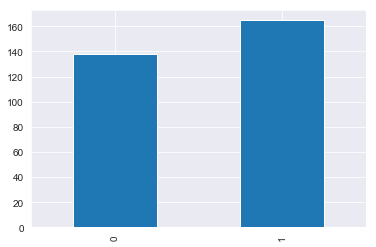

In [36]:
heart["target"].value_counts().sort_index().plot.bar()

In [37]:
heart.age.unique()
heart.ca.unique()
heart.trestbps.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

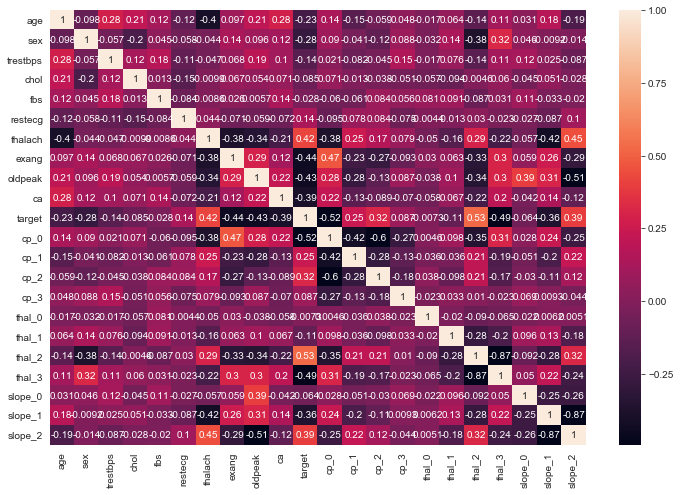

In [38]:
plt.subplots(figsize=(12,8))
sns.heatmap(heart.corr(),robust=True,annot=True)

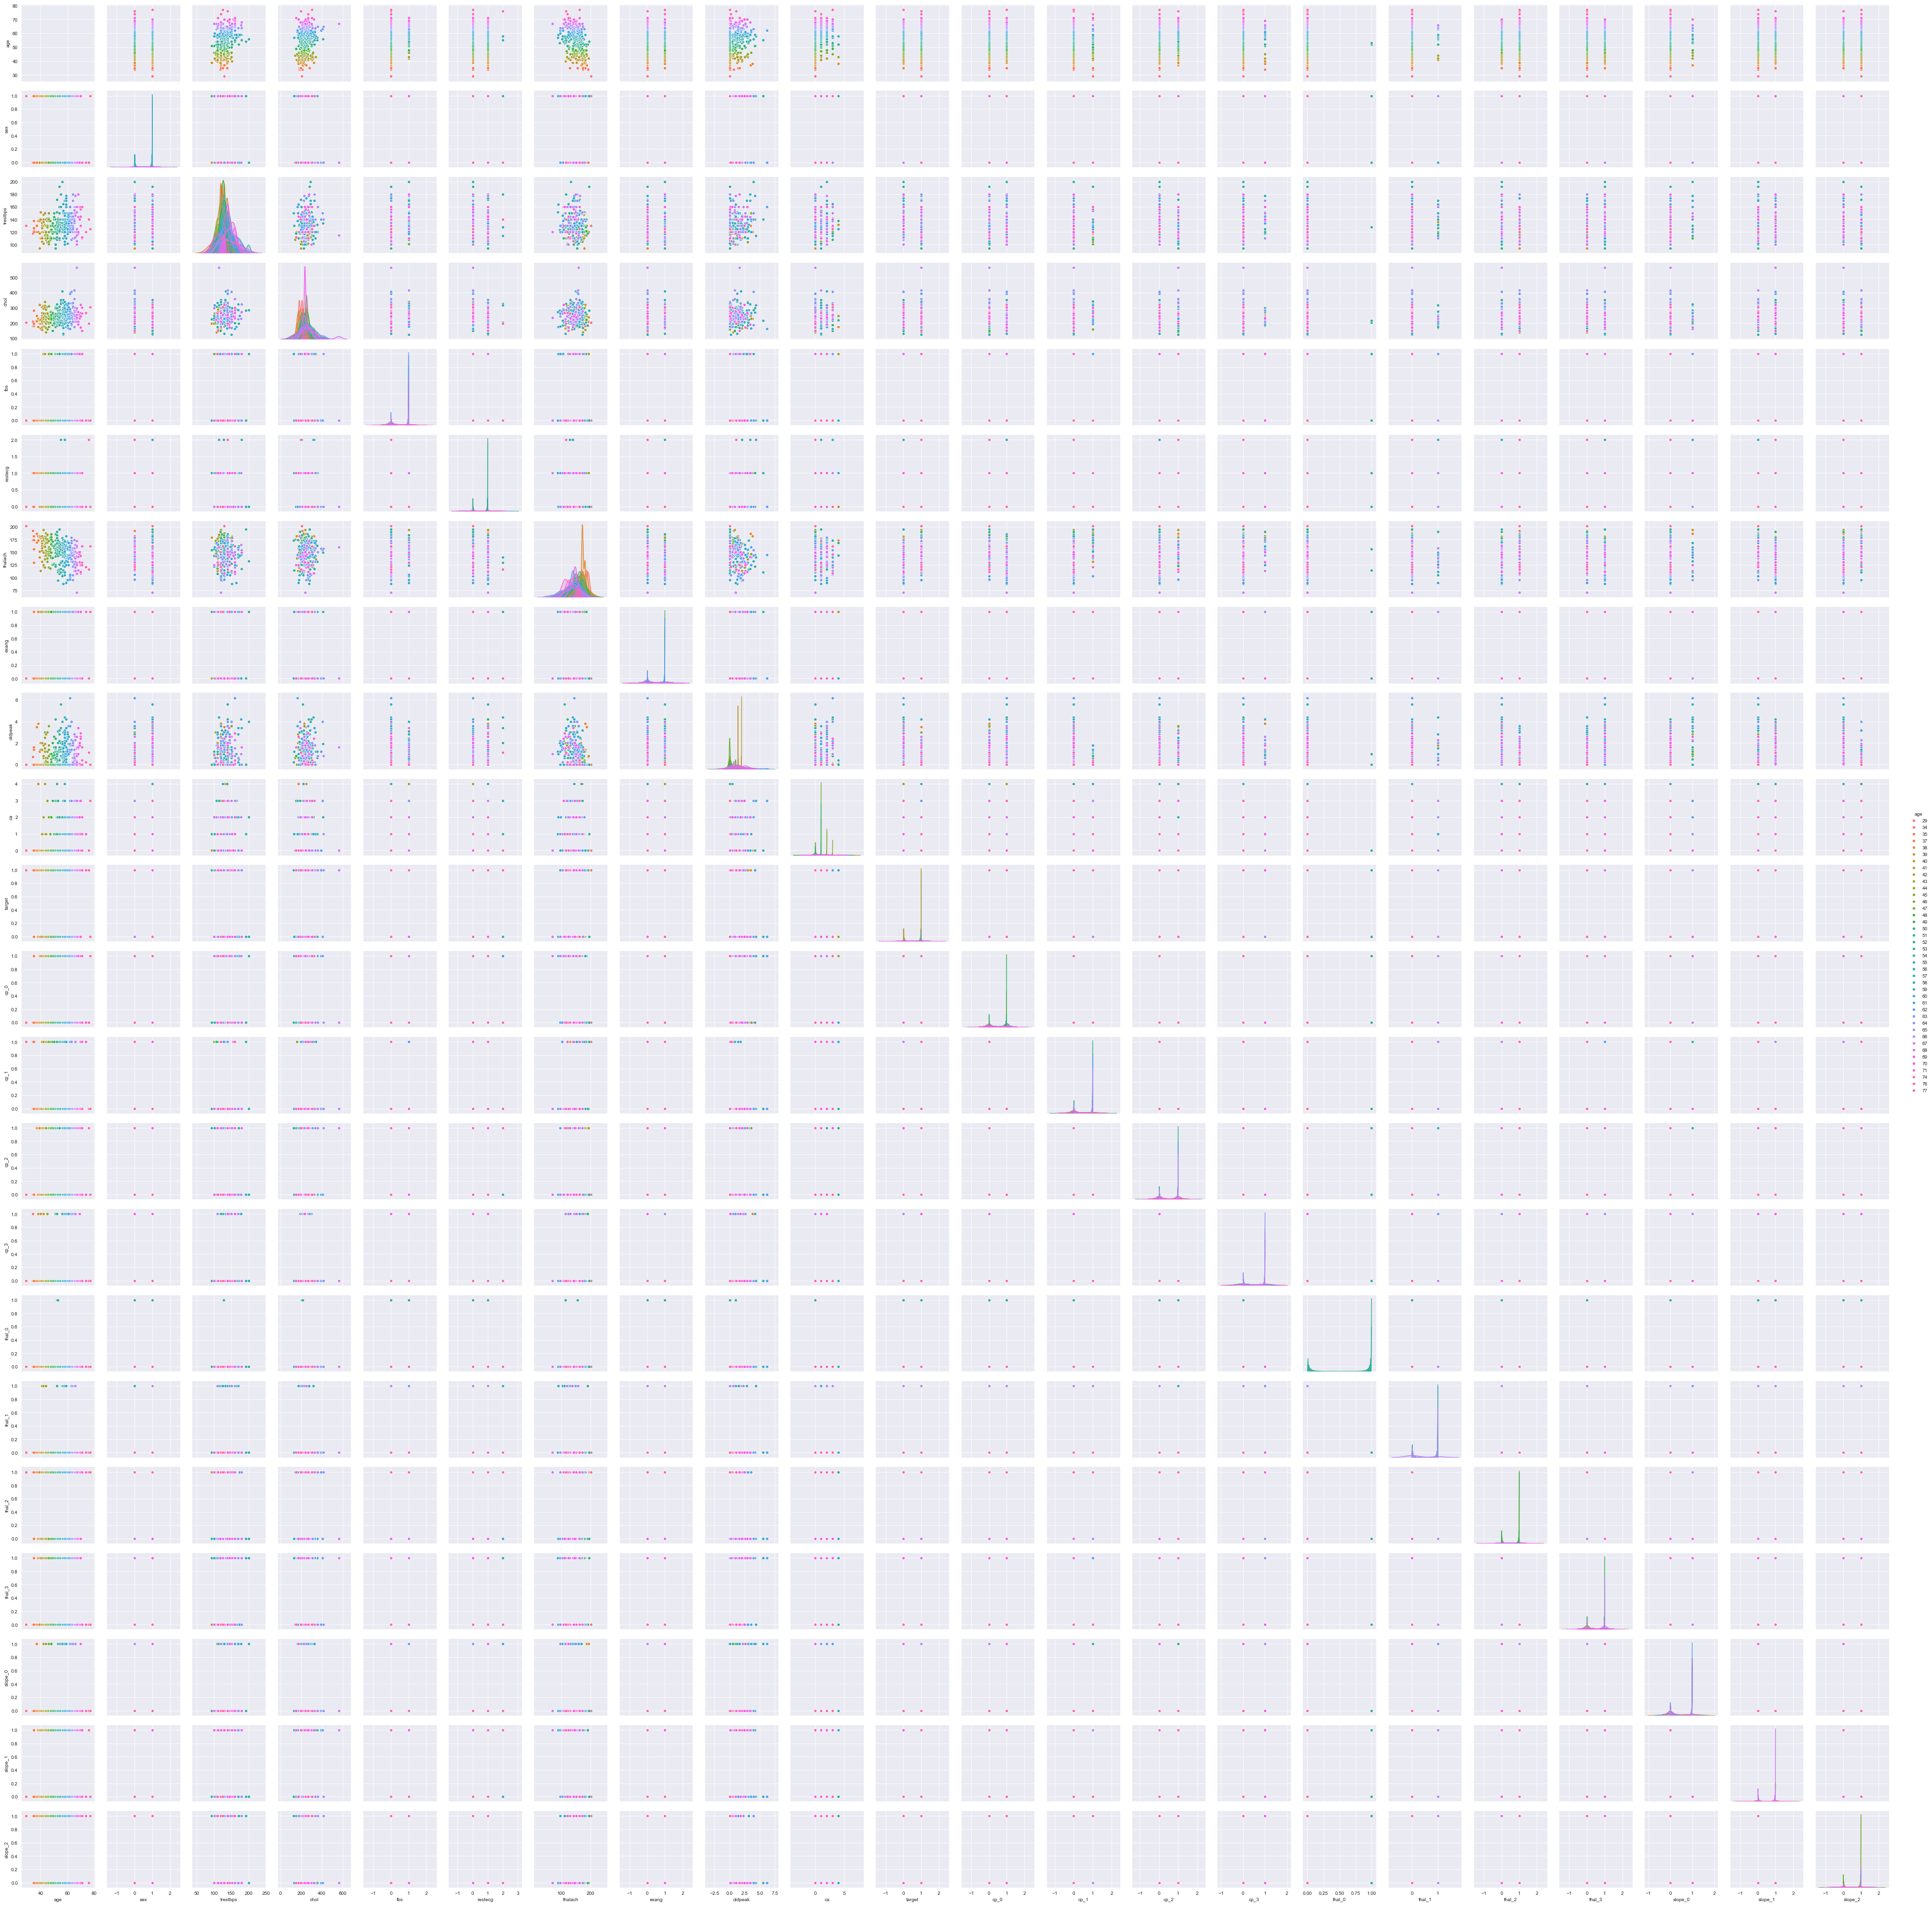

In [39]:
sns.pairplot(heart, hue="age")

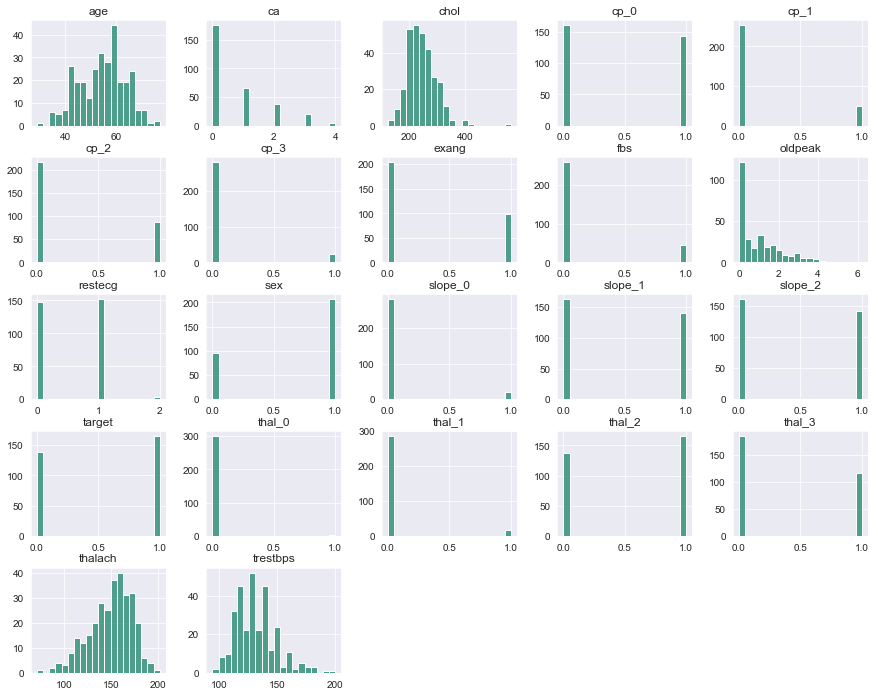

In [40]:
heart.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

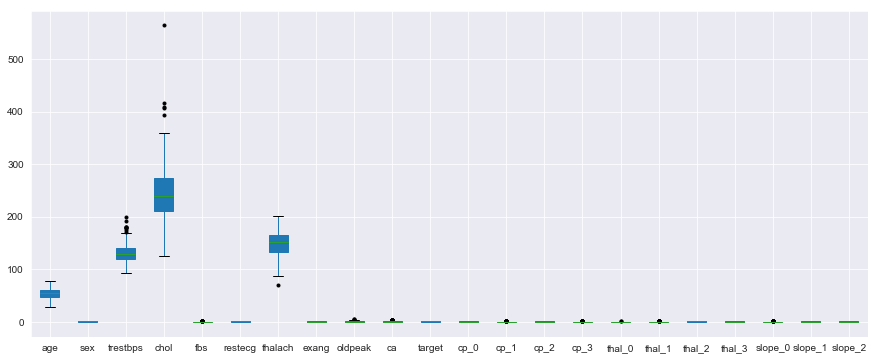

In [41]:
plt.subplots(figsize=(15,6))
heart.boxplot(patch_artist=True, sym="k.")

In [44]:
corr_matrix = heart.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
thal_2      0.527334
thalach     0.421741
slope_2     0.394066
cp_2        0.316742
cp_1        0.245879
restecg     0.137230
cp_3        0.086957
thal_0     -0.007293
fbs        -0.028046
slope_0    -0.063554
chol       -0.085239
thal_1     -0.106589
trestbps   -0.144931
age        -0.225439
sex        -0.280937
slope_1    -0.362053
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
thal_3     -0.486112
cp_0       -0.516015
Name: target, dtype: float64